<a href="https://colab.research.google.com/github/atpathak/DeepLearning_code-templates_2026/blob/main/RNN_LSTM_TimeSeries_StockPrices_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [4]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Creating a data structure with 60 timestamps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
y_train.shape

(1198,)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(1198, 60, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [14]:
regressor = Sequential()


In [15]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

output layer

In [19]:
regressor.add(Dense(units=1))

In [20]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [21]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0968
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0052
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0055
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0049
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0043
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0054
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0042
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0043
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0050
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0036
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0042
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s

In [22]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

Getting Predicted Stock Price for 2017

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

In [26]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step


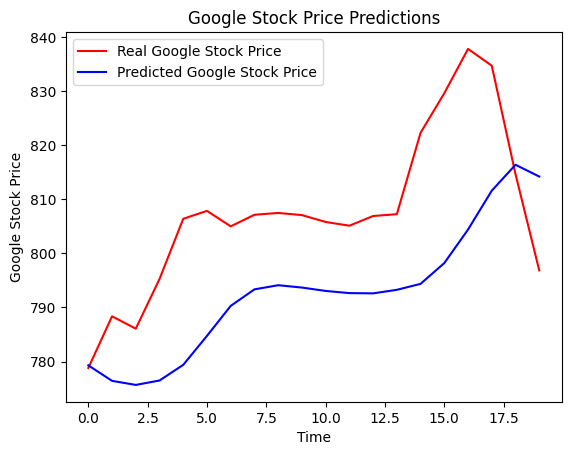

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
    import math
    from sklearn.metrics import mean_squared_error
    rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))